# Charting - Pandas vs Seaborn vs Matplotlib

There are many packages for visualisation in Python. However, the most common you will find out there in tutorials are Pandas, Seaborn and Matplotlib. For beginners, you will find that these tutorials tend to jump between these packages without telling you that they are really different.

The purpose of this is to clarify the difference. I will be putting all three packages with a bar chart and a grouped bar chart. Obviously, there are many other charts out there. However, you will definitely encounter everywhere you go and if you are a power user, you will be generating these often. I thus want to illustrate the difference in generating bar charts between these packages.

# Initiate some things

We will use now famous Titanic dataset. I will be using the Age as the X. 
For ease of visuals, we will filter out all the ages less than 50 years old.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('train.csv')
df1.dropna(subset = ['Age'], inplace = True)
filterage = df1[df1['Age'] >= 50]

# Let's try a bar chart

we will use a normal bar chart with count of people in their respective ages.

Bar Chart using Pandas.

This is a simple affair, but Pandas does not have a bar chart with counts. You will thus need to create a series with counts of Age before plotting the chart.

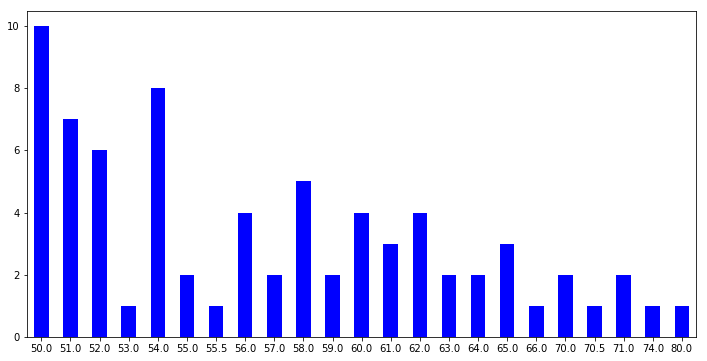

In [16]:
plotting = filterage['Age'].value_counts()
plotting.sort_index(inplace = True)
plt.figure(figsize = [12,6])
plotting.plot(kind = 'bar', rot = 0, color = 'b')
plt.show()

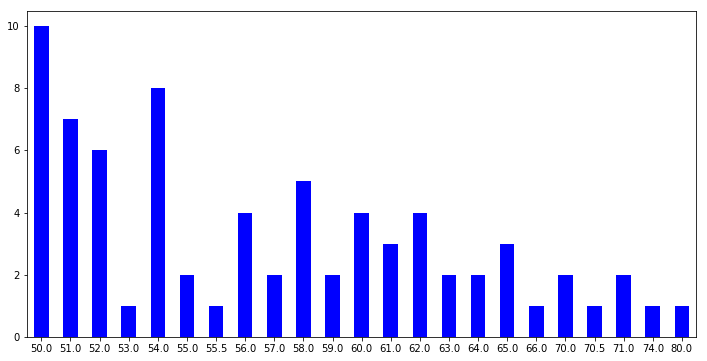

In [15]:
plotting = filterage['Age'].value_counts()
plotting.sort_index(inplace = True)
plt.figure(figsize = [12,6])
plotting.plot.bar(rot = 0, color = 'b')
plt.show()

For Seaborn, you can call the countplot. Easy.

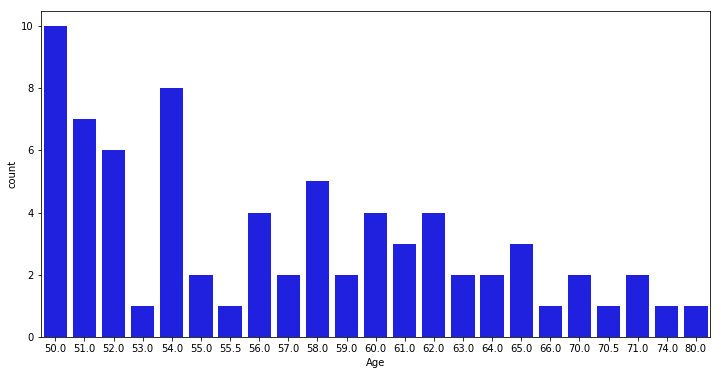

In [12]:
plt.figure(figsize = [12,6])
sns.countplot(x = 'Age', data = filterage, color = 'b')
plt.show()

Matplotlib's package is a nightmare though

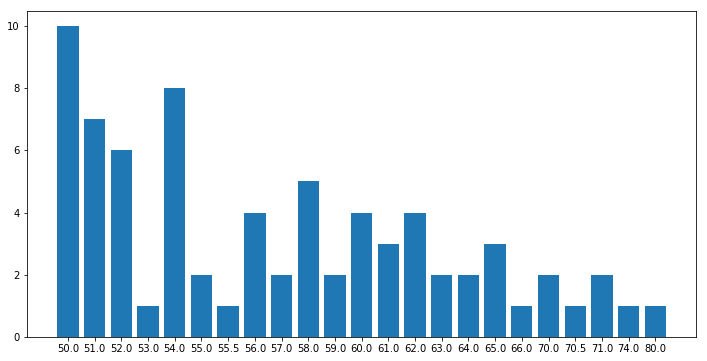

In [17]:
plt.figure(figsize = [12,6])
objects = filterage['Age'].sort_values().unique().tolist()
y_pos = np.arange(len(objects))
plt.bar(x = y_pos, height = plotting)
plt.xticks(y_pos, objects)
plt.show()

# Bar chart for Age grouped by Sex

We start with Pandas' plot. In this case, it is simply easier to make a Pivot Table (pd.pivot_table) and we can do a simple plot from there

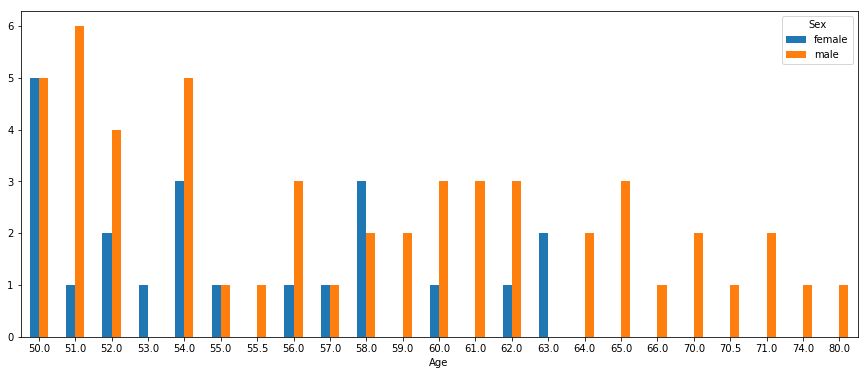

In [27]:
# for both pandas and matplotlib, save yourself the trouble and just do a pivot table
table = pd.pivot_table(filterage, index = ['Age'], values = 'PassengerId', columns = 'Sex', aggfunc = pd.Series.nunique, fill_value = 0)

# Do by pandas' plot
plt.rcParams['figure.figsize'] = [15, 6]
table.plot(kind = 'bar', rot = 0)
plt.show()

As usual, Seaborn comes out on top for being easy. There is no need for a pivot_table. Just need to hue it up. Only now I have to set the legend to upper right corner. 

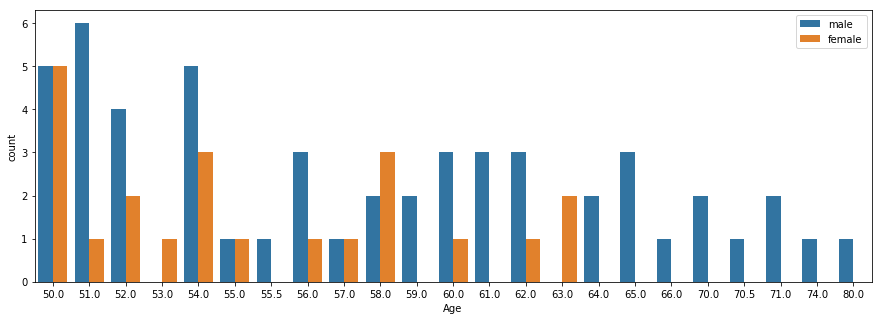

In [33]:
plt.rcParams['figure.figsize'] = [15, 5]
sns.countplot(x = 'Age', data = filterage, hue = 'Sex')
plt.legend(loc = 'upper right')
plt.show()

Again, Matplotlib is a nightmare. Lots of customisation but you have to build it from scratch. Most users will probably want to use Seaborn or Pandas

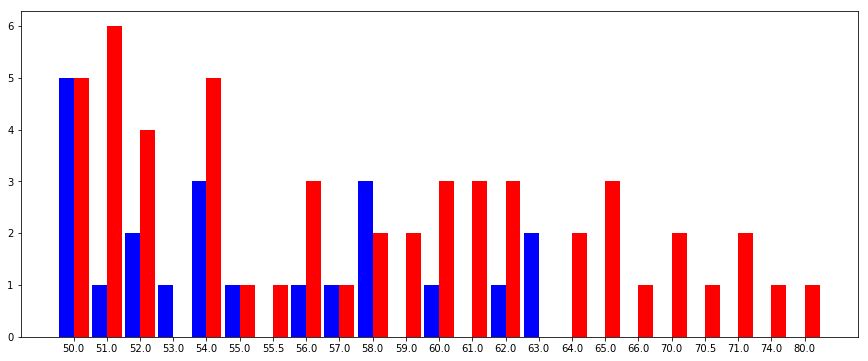

In [34]:
# Do by Matplotlib

# set width of bar
barWidth = 0.45

# set height of bar
bar1 = table['female']
bar2 = table['male']

# bar position
pos1 = np.arange(len(bar1))
pos2 = [x + barWidth for x in pos1]

plt.rcParams['figure.figsize'] = [15, 6]
plt.bar(x = pos1, height = bar1, width=barWidth, color = 'b')
plt.bar(x = pos2, height = bar2, width=barWidth, color = 'r')

# set the x ticks 
plt.xticks([r + (barWidth/2) for r in range(len(bar1))], filterage['Age'].sort_values().unique().tolist())

plt.show()


# Conclusion